#### Image Processing in OpenCV
- Color spaces
- object tracking
- how to find hsv values to track?
- Image Thresholding
- Adaptive Thresholding

#### Changing Colorspaces
- syntax
    - cv2.cvtColor(input_image, flag)
    - flag means type of conversion

- used to convert one image to another image 
- for example 
       - RGB<-->BGR
       - RGB -->GRAY
       - RGB<-->BGR -->GRAY
       - RGB -->HSV
       we have alot of color convergent modes
- We have  274 Color convergent modes
- Color image loaded by OpenCV is in BGR mode
- Color image loadded by matplotlib as in RGB mode
- So when we are displaying image in opencv to maplotlib their is slit changes are done.
- Red pixels appear in blue color and vice versa

       

In [2]:
# To print color convergent models avaialble in openCV and count them

import cv2
count=0
for i in dir(cv2):
    if i.startswith("COLOR_"):
        print("cv2.",end="")
        print(i)
        count+=1
print("\n\nWe have ", count,"Color convergent modes")

cv2.COLOR_BAYER_BG2BGR
cv2.COLOR_BAYER_BG2BGRA
cv2.COLOR_BAYER_BG2BGR_EA
cv2.COLOR_BAYER_BG2BGR_VNG
cv2.COLOR_BAYER_BG2GRAY
cv2.COLOR_BAYER_BG2RGB
cv2.COLOR_BAYER_BG2RGBA
cv2.COLOR_BAYER_BG2RGB_EA
cv2.COLOR_BAYER_BG2RGB_VNG
cv2.COLOR_BAYER_GB2BGR
cv2.COLOR_BAYER_GB2BGRA
cv2.COLOR_BAYER_GB2BGR_EA
cv2.COLOR_BAYER_GB2BGR_VNG
cv2.COLOR_BAYER_GB2GRAY
cv2.COLOR_BAYER_GB2RGB
cv2.COLOR_BAYER_GB2RGBA
cv2.COLOR_BAYER_GB2RGB_EA
cv2.COLOR_BAYER_GB2RGB_VNG
cv2.COLOR_BAYER_GR2BGR
cv2.COLOR_BAYER_GR2BGRA
cv2.COLOR_BAYER_GR2BGR_EA
cv2.COLOR_BAYER_GR2BGR_VNG
cv2.COLOR_BAYER_GR2GRAY
cv2.COLOR_BAYER_GR2RGB
cv2.COLOR_BAYER_GR2RGBA
cv2.COLOR_BAYER_GR2RGB_EA
cv2.COLOR_BAYER_GR2RGB_VNG
cv2.COLOR_BAYER_RG2BGR
cv2.COLOR_BAYER_RG2BGRA
cv2.COLOR_BAYER_RG2BGR_EA
cv2.COLOR_BAYER_RG2BGR_VNG
cv2.COLOR_BAYER_RG2GRAY
cv2.COLOR_BAYER_RG2RGB
cv2.COLOR_BAYER_RG2RGBA
cv2.COLOR_BAYER_RG2RGB_EA
cv2.COLOR_BAYER_RG2RGB_VNG
cv2.COLOR_BGR2BGR555
cv2.COLOR_BGR2BGR565
cv2.COLOR_BGR2BGRA
cv2.COLOR_BGR2GRAY
cv2.COLOR_BGR2HLS
cv2.CO

In [3]:
# Convert one mode to another one color convergent models

import cv2
import matplotlib.pyplot as plt

img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")

BGR=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
GRAY=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
LUV=cv2.cvtColor(BGR,cv2.COLOR_BGR2LUV)
LBGR=cv2.cvtColor(LUV,cv2.COLOR_LUV2LBGR)
LAB=cv2.cvtColor(BGR,cv2.COLOR_BGR2LAB)
RGBA=cv2.cvtColor(BGR,cv2.COLOR_BGR2RGBA)
HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
names=[BGR,GRAY,LUV,LBGR,LAB,RGBA,HSV]
title=["BGR","GRAY","LUV","LBGR","LAB","RGBA","HSV"]
for i in range(0,len(names),1):
    cv2.imshow(title[i],names[i])
    plt.subplot(2,8,i+1)
    plt.imshow(names[i]),plt.title(title[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

<Figure size 640x480 with 7 Axes>

#### Object Tracking

- In this we will try to extract a blue colored objects
- Take a frame in video or an image
- Convert from BGR to HSV color-space
- We threshold the HSV image for a range of blue color
- Now extract the blue object alone, we can do whatever on that image we want.

In [4]:
import numpy as np

img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

lower_red = np.array([0,0,255])
upper_red = np.array([85,85,255])

mask=cv2.inRange(hsv,lower_blue,upper_blue)
res = cv2.bitwise_and(img,img, mask= mask)

cv2.imshow("hsv",hsv)
cv2.imshow("img",img)
cv2.imshow("mask",mask)
cv2.imshow("res",res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Video

capture=cv2.VideoCapture(0)
while True:
    ret,frame=capture.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    lower_blue=np.array([110,50,50])
    upper_blue=np.array([130,255,255])
    mask=cv2.inRange(hsv,lower_blue,upper_blue)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    cv2.imshow("frame",frame)
    cv2.imshow("mask",mask)
    cv2.imshow("res",res)
    if cv2.waitKey(1)==27:
        break
cv2.destroyAllWindows()
capture.release()

#### How to find HSV values to track?
- we can do this by using cv2.cvtColor function
- Instead of passing an image, you just pass the BGR values you want

In [12]:
red=np.uint8([[[0,0,255]]])
hsv_value_red=cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print(hsv_value_red)

[[[  0 255 255]]]


In [10]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)

[[[ 60 255 255]]]


In [13]:
blue=np.uint8([[[255,0,0]]])
hsv_blue=cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
print(hsv_blue)

[[[120 255 255]]]


#### Image Thresholding
- Simple Thresholding
    - If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value(black)
    - The function used is cv2.threshold
    - input
        - source image, which should be a grayscale image
        - Second argument is the threshold value which is used to classify the pixel values
        - Third argument is the maxVal 
        - different styles of thresholding we will use one as fourth argument

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV
        

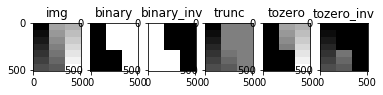

In [21]:
import matplotlib.pyplot as plt
img=cv2.imread("standard_test_images\\standard_test_images\\gray.tiff")
ret,binary=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,binary_inv=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,trunc=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,tozero=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,tozero_inv=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
names=[img,binary,binary_inv,trunc,tozero,tozero_inv]
titles=['img','binary','binary_inv','trunc','tozero','tozero_inv']
for i in range(0,len(names),1):
    #cv2.imshow(titles[i],names[i])
    plt.subplot(2,6,i+1)
    plt.imshow(names[i]),plt.title(titles[i])
    #if cv2.waitKey(1)==27:
     #   break
#cv2.destroyAllWindows()
plt.show()

#### Adaptive Thresholding

- in previous one we used a global value as threshold value
- But it may not be good in all the conditions where image has different lighting conditions in different areas.
- So we will use adaptive thresholding
- algorithm calculate the threshold for a small regions of the image. 
- So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

- Adaptive Method - It decides how thresholding value is calculated.

- cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.
- Block Size -> It decides the size of neighbourhood area.

- C -> It is just a constant which is subtracted from the mean or weighted mean calculated

In [1]:
import cv2
img=cv2.imread("standard_test_images\\standard_test_images\\gray.tiff",0)
img=cv2.medianBlur(img,5)
mean=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
gaus=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,13,2)

cv2.imshow('mean',mean)
cv2.imshow('gaus',gaus)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
1026 * 1026


1052676

In [2]:
img = cv2.imread("standard_test_images\\standard_test_images\\gray.tiff",0)
img = cv2.medianBlur(img,5)
#ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,150,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,13,2)
cv2.imshow("th2",th2)
cv2.imshow("th3",th3)
#plt.imshow(th3)
cv2.waitKey(0)
cv2.destroyAllWindows()